In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from datetime import datetime

from sklearn.model_selection import train_test_split

In [16]:
revenue = pd.read_csv('../data/revenue_by_day.csv')

In [17]:
revenue.head()

,date,revenue,covers,per_cover_average
0,2018-03-15,19223,250.0,76.89
1,2018-03-16,13239,172.0,76.97
2,2018-03-17,13068,170.0,76.87
3,2018-03-18,20751,270.0,76.86
4,2018-03-19,22788,296.0,76.99


In [18]:
revenue['date'] = pd.to_datetime(revenue['date'])

In [22]:
revenue.set_index('date', inplace = True)

In [23]:
revenue

,revenue,covers,per_cover_average
date,,,
2018-03-15,19223,250.0,76.89
2018-03-16,13239,172.0,76.97
2018-03-17,13068,170.0,76.87
2018-03-18,20751,270.0,76.86
2018-03-19,22788,296.0,76.99
...,...,...,...
2021-03-09,25376,330.0,76.90
2021-03-10,27039,352.0,76.82
2021-03-11,26265,341.0,77.02


# Train/Test/Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(revenue.drop(columns = ['revenue','per_cover_average']),
                                                   revenue['revenue'],
                                                   test_size = .2,
                                                   shuffle = False)

In [27]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train.head()
X_test.head()

,const,covers
date,,
2020-08-07,1.0,176.0
2020-08-08,1.0,111.0
2020-08-09,1.0,151.0
2020-08-10,1.0,110.0
2020-08-11,1.0,139.0


In [29]:
y_train = y_train[X_train.index]

In [30]:
lm = sm.OLS(y_train, X_train)

In [31]:
lm_results = lm.fit()

In [32]:
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.288e+07
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:42:58   Log-Likelihood:                -3957.5
No. Observations:                 876   AIC:                             7919.
Df Residuals:                     874   BIC:                             7929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9971      2.742      0.728      0.4

In [34]:
lm_results.predict(X_test)

date
2020-08-07    13540.001498
2020-08-08     8540.170326
2020-08-09    11616.989509
2020-08-10     8463.249846
2020-08-11    10693.943754
                  ...     
2021-03-09    25385.755352
2021-03-10    27078.005902
2021-03-11    26231.880627
2021-03-12    27154.926382
2021-03-13    16155.297803
Length: 219, dtype: float64

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
r2_score(y_test, lm_results.predict(X_test))

0.9999795694324384

In [39]:
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

22.06606707501849

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 7 Text major ticklabel objects>)

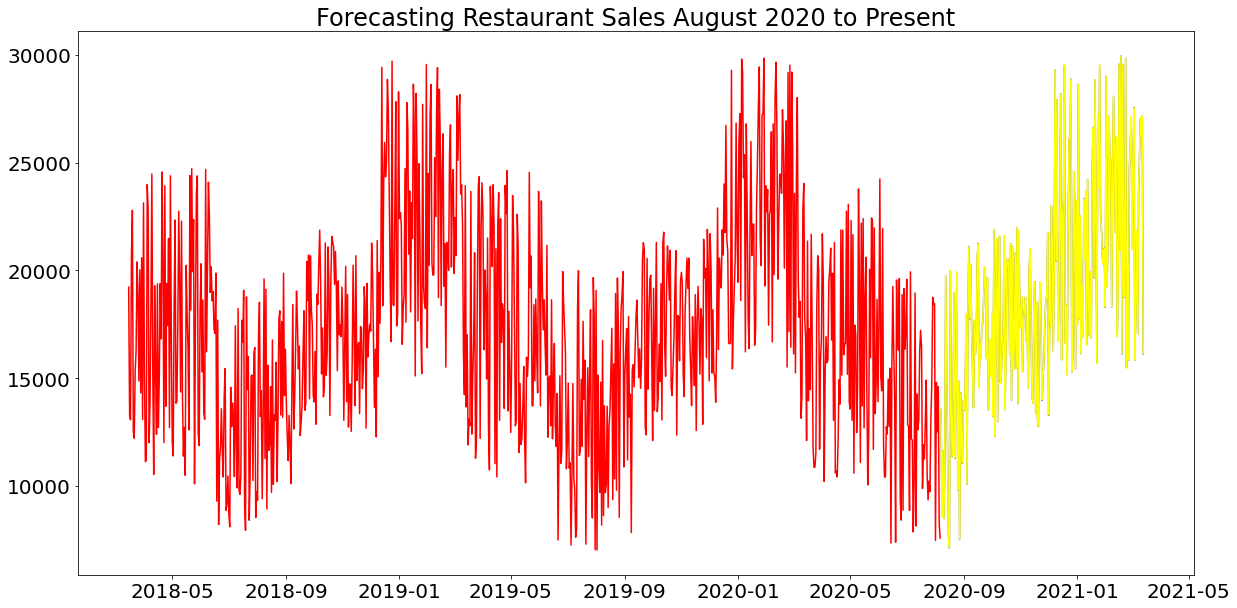

In [45]:
plt.figure(figsize = (20,10))

plt.plot(y_train.index, y_train.values, color = 'red')

plt.plot(y_test.index, y_test.values, color = 'grey')

plt.plot(lm_results.predict(X_test), color = 'yellow')

plt.title(label = 'Forecasting Restaurant Sales August 2020 to Present', fontsize = 24)

plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)